In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings

from google.colab import drive
drive.mount('/content/drive')

from sklearn.preprocessing import OneHotEncoder

Mounted at /content/drive


In [ ]:
# Uploading Data
path='/content/drive/Shareddrives/Data_TFM/Dataset_Final/df_final_v6.csv'
df= pd.read_csv(path, sep=",",  low_memory=False)

In [ ]:
# Visualizing data types
print(df.info())
df.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3201849 entries, 0 to 3201848
Data columns (total 38 columns):
 #   Column                                                      Dtype  
---  ------                                                      -----  
 0   date_day                                                    object 
 1   unique_venue_id                                             int64  
 2   antiguedad                                                  float64
 3   saas_product_tw_connect                                     float64
 4   saas_product_tw_pro                                         float64
 5   n_channel                                                   float64
 6   net_orders                                                  float64
 7   orders_cancellation_rate                                    float64
 8   net_aov                                                     float64
 9   net_take_rate                                               float64
 10  prepay

,date_day,unique_venue_id,antiguedad,saas_product_tw_connect,saas_product_tw_pro,n_channel,net_orders,orders_cancellation_rate,net_aov,net_take_rate,...,is_widget_duration,is_purchasable_duration,churn,is_widget_duration_bin_Less_than_one_year_widget,is_widget_duration_bin_More_than_one_year_widget,is_widget_duration_bin_Not_enabled_widget,is_purchasable_duration_bin_Less_than_one_year_purchasable,is_purchasable_duration_bin_More_than_one_year_purchasable,is_purchasable_duration_bin_Not_purchasable,month
0,2021-06-01,11000000002,160.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,6
1,2021-06-01,11000000004,144.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,6
2,2021-06-01,11000000006,124.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,6


In [ ]:
# Visualizing % of variables with Nulls
df.isna().mean()*100

date_day                                                      0.0
unique_venue_id                                               0.0
antiguedad                                                    0.0
saas_product_tw_connect                                       0.0
saas_product_tw_pro                                           0.0
n_channel                                                     0.0
net_orders                                                    0.0
orders_cancellation_rate                                      0.0
net_aov                                                       0.0
net_take_rate                                                 0.0
prepay                                                        0.0
Newbie                                                        0.0
Referral                                                      0.0
Explorer                                                      0.0
Loyal                                                         0.0
appointmen

In [ ]:
# Modifying data types
df["unique_venue_id"] = df["unique_venue_id"].astype(str)
df['date_day'] = pd.to_datetime(df['date_day'])
df.isna().mean()*100

date_day                                                      0.0
unique_venue_id                                               0.0
antiguedad                                                    0.0
saas_product_tw_connect                                       0.0
saas_product_tw_pro                                           0.0
n_channel                                                     0.0
net_orders                                                    0.0
orders_cancellation_rate                                      0.0
net_aov                                                       0.0
net_take_rate                                                 0.0
prepay                                                        0.0
Newbie                                                        0.0
Referral                                                      0.0
Explorer                                                      0.0
Loyal                                                         0.0
appointmen

In [ ]:
# Ordering dataset by date_day and unique_venue_id 
df = df.sort_values(by=["date_day", "unique_venue_id"])

In [ ]:
# Verify existence of non duplicates for date_day and unique_venu_id, which are both Primary Keys
print(df.duplicated(subset=['unique_venue_id', 'date_day'], keep=False).sum())
print(df.duplicated(subset=df.columns, keep=False).sum())

0
0


In [ ]:
# Eliminating variables with low impact/information on churn 
cols_to_drop = ["month", "is_purchasable_duration_bin_Not_purchasable", "is_purchasable_duration_bin_More_than_one_year_purchasable", "net_take_rate",
                "is_purchasable_duration_bin_Less_than_one_year_purchasable", "is_widget_duration_bin_Not_enabled_widget",
                "is_widget_duration_bin_More_than_one_year_widget", "is_widget_duration_bin_Less_than_one_year_widget", "is_purchasable_duration",
                "orders_cancellation_rate"]

df = df.drop(cols_to_drop, axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3201849 entries, 0 to 3201848
Data columns (total 28 columns):
 #   Column                                        Dtype         
---  ------                                        -----         
 0   date_day                                      datetime64[ns]
 1   unique_venue_id                               object        
 2   antiguedad                                    float64       
 3   saas_product_tw_connect                       float64       
 4   saas_product_tw_pro                           float64       
 5   n_channel                                     float64       
 6   net_orders                                    float64       
 7   net_aov                                       float64       
 8   prepay                                        float64       
 9   Newbie                                        float64       
 10  Referral                                      float64       
 11  Explorer                

In [ ]:
# Creation of columns non_profitable_customer/profitable_customer based on Customer Types 
df["profitable_customer"] = df['Loyal'] + df['Referral']
df["non_profitable_customer"] = df['Newbie'] + df['Explorer']

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3201849 entries, 0 to 3201848
Data columns (total 30 columns):
 #   Column                                        Dtype         
---  ------                                        -----         
 0   date_day                                      datetime64[ns]
 1   unique_venue_id                               object        
 2   antiguedad                                    float64       
 3   saas_product_tw_connect                       float64       
 4   saas_product_tw_pro                           float64       
 5   n_channel                                     float64       
 6   net_orders                                    float64       
 7   net_aov                                       float64       
 8   prepay                                        float64       
 9   Newbie                                        float64       
 10  Referral                                      float64       
 11  Explorer                

In [ ]:
# Eliminating variables used to calculate profitablity of customre
cols_to_drop = ["Newbie","Referral","Explorer","Loyal"]# A futuro: Loyal + Referral = non_profitable_customer, Explorer + Newbie = profitable_customer

df = df.drop(cols_to_drop, axis=1)

In [ ]:
df.to_csv('/content/drive/Shareddrives/Data_TFM/Dataset_Final/df_final_v7.csv', sep=",", index=False)

In [ ]:
# Creating datafrme inices
df.set_index(['unique_venue_id', 'date_day'], inplace=True)

# Columnes to decode
columns_to_decode = ['saas_product', 'is_tw_mp_listed', 'marketplace_payment_method', 'widget_payment_method']

# Decoded columes 
decoded_df = pd.DataFrame()

for column in columns_to_decode:
    encoded_columns = [col for col in df.columns if col.startswith(column)]
    decoded_column = df[encoded_columns].astype(int).idxmax(axis=1).str.replace(column + '_', '')
    decoded_df[column] = decoded_column

In [ ]:
# Converting index to column
decoded_df = decoded_df.reset_index()
decoded_df

,unique_venue_id,date_day,saas_product,is_tw_mp_listed,marketplace_payment_method,widget_payment_method
0,11000000002,2021-06-01,tw_connect,True,PREPAY_ONLY,PREPAY_ONLY
1,11000000004,2021-06-01,tw_connect,True,ALL_METHODS,ALL_METHODS
2,11000000006,2021-06-01,tw_connect,True,ALL_METHODS,ALL_METHODS
3,11000000007,2021-06-01,tw_connect,True,ALL_METHODS,ALL_METHODS
4,11000000008,2021-06-01,tw_connect,True,ALL_METHODS,ALL_METHODS
...,...,...,...,...,...,...
3201844,12000048321,2023-05-01,tw_pro,N/A,UNKNOWN,UNKNOWN
3201845,12000048322,2023-05-01,tw_pro,N/A,UNKNOWN,UNKNOWN
3201846,12000048323,2023-05-01,tw_pro,N/A,UNKNOWN,UNKNOWN
3201847,12000048324,2023-05-01,tw_pro,N/A,UNKNOWN,UNKNOWN


In [ ]:
# Existence of duplicates
print(decoded_df.duplicated(subset=['unique_venue_id', 'date_day'], keep=False).sum())
print(decoded_df.duplicated(subset=decoded_df.columns, keep=False).sum())

0
0


In [ ]:
df = df.reset_index()

# Eliminating decoded columns
cols_to_drop_2 = ["saas_product_tw_connect", "saas_product_tw_pro", "is_tw_mp_listed_False", "is_tw_mp_listed_N/A", "is_tw_mp_listed_True",
                  "marketplace_payment_method_ALL_METHODS", "marketplace_payment_method_PAY_AT_VENUE_ONLY", "marketplace_payment_method_PREPAY_ONLY",
                  "marketplace_payment_method_UNKNOWN", "widget_payment_method_ALL_METHODS", "widget_payment_method_PAY_AT_VENUE_ONLY",
                  "widget_payment_method_PREPAY_ONLY", "widget_payment_method_UNKNOWN"]

df = df.drop(cols_to_drop_2, axis=1)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3201849 entries, 0 to 3201848
Data columns (total 13 columns):
 #   Column                    Dtype         
---  ------                    -----         
 0   unique_venue_id           object        
 1   date_day                  datetime64[ns]
 2   antiguedad                float64       
 3   n_channel                 float64       
 4   net_orders                float64       
 5   net_aov                   float64       
 6   prepay                    float64       
 7   appointments_l30d         float64       
 8   online_appointments_rate  float64       
 9   is_widget_duration        float64       
 10  churn                     float64       
 11  profitable_customer       float64       
 12  non_profitable_customer   float64       
dtypes: datetime64[ns](1), float64(11), object(1)
memory usage: 317.6+ MB


In [ ]:
# Union of Dataframes
merged_df = pd.merge(df, decoded_df, on=['unique_venue_id', 'date_day'], how='inner')

# Final Dataframe
print(merged_df.info())
print()
merged_df.head(5)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3201849 entries, 0 to 3201848
Data columns (total 17 columns):
 #   Column                      Dtype         
---  ------                      -----         
 0   unique_venue_id             object        
 1   date_day                    datetime64[ns]
 2   antiguedad                  float64       
 3   n_channel                   float64       
 4   net_orders                  float64       
 5   net_aov                     float64       
 6   prepay                      float64       
 7   appointments_l30d           float64       
 8   online_appointments_rate    float64       
 9   is_widget_duration          float64       
 10  churn                       float64       
 11  profitable_customer         float64       
 12  non_profitable_customer     float64       
 13  saas_product                object        
 14  is_tw_mp_listed             object        
 15  marketplace_payment_method  object        
 16  widget_payment_met

,unique_venue_id,date_day,antiguedad,n_channel,net_orders,net_aov,prepay,appointments_l30d,online_appointments_rate,is_widget_duration,churn,profitable_customer,non_profitable_customer,saas_product,is_tw_mp_listed,marketplace_payment_method,widget_payment_method
0,11000000002,2021-06-01,160.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,tw_connect,True,PREPAY_ONLY,PREPAY_ONLY
1,11000000004,2021-06-01,144.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,tw_connect,True,ALL_METHODS,ALL_METHODS
2,11000000006,2021-06-01,124.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,tw_connect,True,ALL_METHODS,ALL_METHODS
3,11000000007,2021-06-01,160.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,tw_connect,True,ALL_METHODS,ALL_METHODS
4,11000000008,2021-06-01,160.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,tw_connect,True,ALL_METHODS,ALL_METHODS


In [ ]:
# Duplicates and NaN values per variable
print(merged_df.duplicated(subset=['unique_venue_id', 'date_day'], keep=False).sum())
print(merged_df.duplicated(subset=merged_df.columns, keep=False).sum())
print()
print(merged_df.isna().mean()*100)

0
0

unique_venue_id               0.0
date_day                      0.0
antiguedad                    0.0
n_channel                     0.0
net_orders                    0.0
net_aov                       0.0
prepay                        0.0
appointments_l30d             0.0
online_appointments_rate      0.0
is_widget_duration            0.0
churn                         0.0
profitable_customer           0.0
non_profitable_customer       0.0
saas_product                  0.0
is_tw_mp_listed               0.0
marketplace_payment_method    0.0
widget_payment_method         0.0
dtype: float64


## Churn analysis on binary varibles

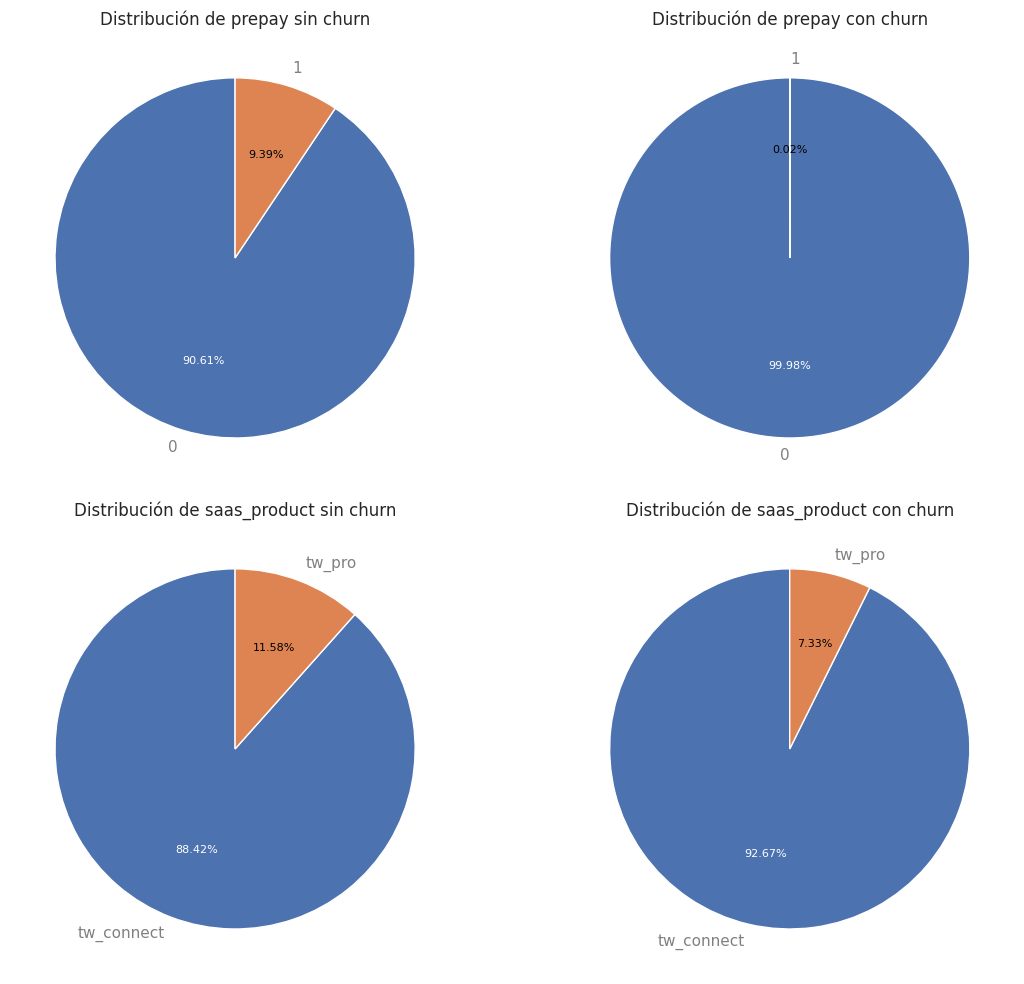

In [ ]:
# Creating Plots
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 10))

# Creating graphs with the variable prepay without churn 
prepay_client = merged_df[merged_df["churn"] == 0]
patches, texts, autotexts = ax1.pie(prepay_client.prepay.value_counts(), labels=["0", "1"], autopct="%1.2f%%", startangle=90)
plt.setp(texts, color="grey")
plt.setp(autotexts, size=8, color="white")
autotexts[1].set_color("black")
ax1.set_title("Distribución de prepay sin churn")

# Creating graphs with the variable prepay with churn 
prepay_churn = merged_df[merged_df["churn"] == 1]
patches, texts, autotexts = ax2.pie(prepay_churn.prepay.value_counts(), labels=["0", "1"], autopct="%1.2f%%", startangle=90)
plt.setp(texts, color="grey")
plt.setp(autotexts, size=8, color="white")
autotexts[1].set_color("black")
ax2.set_title("Distribución de prepay con churn")

# Creating graphs with the variable saas_product without churn 
saas_product_client = merged_df[merged_df["churn"] == 0]
patches, texts, autotexts = ax3.pie(saas_product_client.saas_product.value_counts(), labels=["tw_connect", "tw_pro"], autopct="%1.2f%%", startangle=90)
plt.setp(texts, color="grey")
plt.setp(autotexts, size=8, color="white")
autotexts[1].set_color("black")
ax3.set_title("Distribución de saas_product sin churn")

# Creating graphs with the variable saas_product with churn 
saas_product_churn = merged_df[merged_df["churn"] == 1]
patches, texts, autotexts = ax4.pie(saas_product_churn.saas_product.value_counts(), labels=["tw_connect", "tw_pro"], autopct="%1.2f%%", startangle=90)
plt.setp(texts, color="grey")
plt.setp(autotexts, size=8, color="white")
autotexts[1].set_color("black")
ax4.set_title("Distribución de saas_product con churn")

# Ajusting figures
fig.tight_layout()

### Conclusions
- **Variable prepay:** Podemos ver que la distribución de la variable prepay se comporta de forma diferente en ambos grupos. Esto indica que esta variable puede tener una cierta importancia en la decisión de realizar churn de las diferentes venues. En este caso, parece ser que las venues que ofrecen la posibilidad de prepay tienen menos probabilidad a relaizar churn.
- Variable **saas_product:** Podemos ver que la distribución de la variable saas_product se comporta de forma relativamente diferente en ambos grupos. Esto indica que esta variable puede tener una cierta importancia en la decisión de realizar churn de las diferentes venues.

## Churn analysis with categoric variables

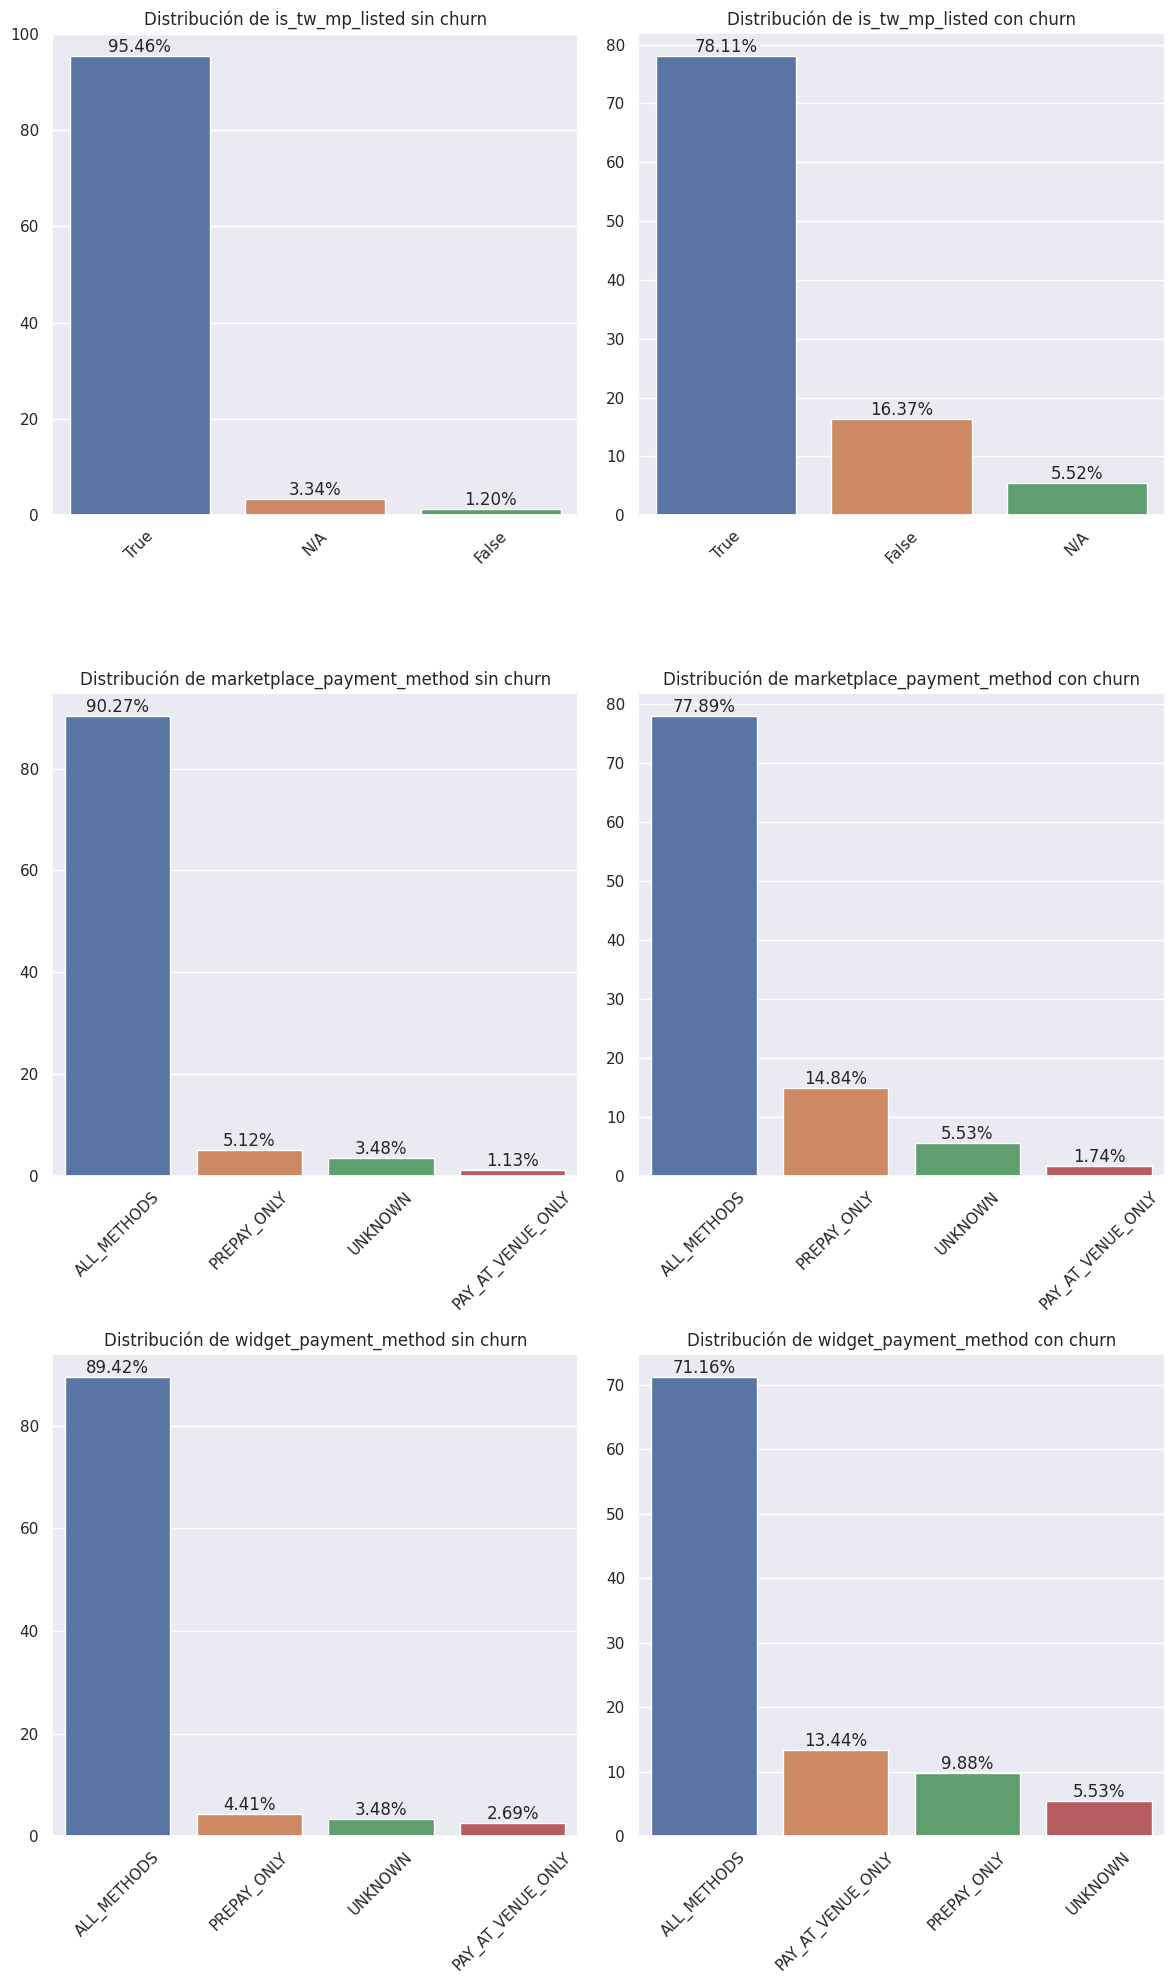

In [ ]:
# Crear el conjunto de figuras
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize=(12, 20))

# Crear el gráfico de la variable is_tw_mp_listed sin churn
is_tw_mp_listed_client = merged_df[merged_df["churn"] == 0]
is_tw_mp_listed_client = is_tw_mp_listed_client['is_tw_mp_listed'].value_counts(normalize=True) * 100
sns.barplot(x=is_tw_mp_listed_client.index, y=is_tw_mp_listed_client.values, ax=ax1)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)
ax1.set_title("Distribución de is_tw_mp_listed sin churn")
# Agregar el porcentaje en la parte superior de cada barra
for p in ax1.patches:
    height = p.get_height()
    ax1.text(p.get_x() + p.get_width() / 2, height, f'{height:.2f}%', ha='center', va='bottom')

# Crear el gráfico de la variable is_tw_mp_listed con churn
is_tw_mp_listed_churn = merged_df[merged_df["churn"] == 1]
is_tw_mp_listed_churn = is_tw_mp_listed_churn['is_tw_mp_listed'].value_counts(normalize=True) * 100
sns.barplot(x=is_tw_mp_listed_churn.index, y=is_tw_mp_listed_churn.values, ax=ax2)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45)
ax2.set_title("Distribución de is_tw_mp_listed con churn")
# Agregar el porcentaje en la parte superior de cada barra
for p in ax2.patches:
    height = p.get_height()
    ax2.text(p.get_x() + p.get_width() / 2, height, f'{height:.2f}%', ha='center', va='bottom')

# Crear el gráfico de la variable marketplace_payment_method sin churn
marketplace_payment_method_client = merged_df[merged_df["churn"] == 0]
marketplace_payment_method_client = marketplace_payment_method_client['marketplace_payment_method'].value_counts(normalize=True) * 100
sns.barplot(x=marketplace_payment_method_client.index, y=marketplace_payment_method_client.values, ax=ax3)
ax3.set_xticklabels(ax3.get_xticklabels(), rotation=45)
ax3.set_title("Distribución de marketplace_payment_method sin churn")
# Agregar el porcentaje en la parte superior de cada barra
for p in ax3.patches:
    height = p.get_height()
    ax3.text(p.get_x() + p.get_width() / 2, height, f'{height:.2f}%', ha='center', va='bottom')

# Crear el gráfico de la variable marketplace_payment_method con churn
marketplace_payment_method_churn = merged_df[merged_df["churn"] == 1]
marketplace_payment_method_churn = marketplace_payment_method_churn['marketplace_payment_method'].value_counts(normalize=True) * 100
sns.barplot(x=marketplace_payment_method_churn.index, y=marketplace_payment_method_churn.values, ax=ax4)
ax4.set_xticklabels(ax4.get_xticklabels(), rotation=45)
ax4.set_title("Distribución de marketplace_payment_method con churn")
# Agregar el porcentaje en la parte superior de cada barra
for p in ax4.patches:
    height = p.get_height()
    ax4.text(p.get_x() + p.get_width() / 2, height, f'{height:.2f}%', ha='center', va='bottom')

# Crear el gráfico de la variable widget_payment_method sin churn
widget_payment_method_client = merged_df[merged_df["churn"] == 0]
widget_payment_method_client = widget_payment_method_client['widget_payment_method'].value_counts(normalize=True) * 100
sns.barplot(x=widget_payment_method_client.index, y=widget_payment_method_client.values, ax=ax5)
ax5.set_xticklabels(ax5.get_xticklabels(), rotation=45)
ax5.set_title("Distribución de widget_payment_method sin churn")
# Agregar el porcentaje en la parte superior de cada barra
for p in ax5.patches:
    height = p.get_height()
    ax5.text(p.get_x() + p.get_width() / 2, height, f'{height:.2f}%', ha='center', va='bottom')

# Crear el gráfico de la variable widget_payment_method con churn
widget_payment_method_churn = merged_df[merged_df["churn"] == 1]
widget_payment_method_churn = widget_payment_method_churn['widget_payment_method'].value_counts(normalize=True) * 100
sns.barplot(x=widget_payment_method_churn.index, y=widget_payment_method_churn.values, ax=ax6)
ax6.set_xticklabels(ax6.get_xticklabels(), rotation=45)
ax6.set_title("Distribución de widget_payment_method con churn")
# Agregar el porcentaje en la parte superior de cada barra
for p in ax6.patches:
    height = p.get_height()
    ax6.text(p.get_x() + p.get_width() / 2, height, f'{height:.2f}%', ha='center', va='bottom')

# Ajustar el diseño de la figura
fig.tight_layout()

### Conclusions
- **Variable is_tw_mp_listed:** 
  - We can see that the distribution of the is_tw_mp_listed variable behaves differently in both groups.
  - This indicates that this variable may have some importance in the decision to churn different venues.
  - In this case, it seems that venues listed as tw_mp have a lower probability of churning.

- **Variable marketplace_payment_method:** 
  - We can see that the distribution of the marketplace_payment_method variable behaves differently in both groups.
  - This indicates that this variable may have some importance in the decision to churn different venues.
  - In this case, it seems that venues that only offer the "prepay_only" option have a higher probability of churning.

- **Variable widget_payment_method:** 
  - We can see that the distribution of the widget_payment_method variable behaves differently in both groups.
  - This indicates that this variable may have some importance in the decision to churn different venues.
  - In this case, it seems that venues that only offer the "prepay_only" or "pay_at_venue_only" options have a higher probability of churning.


## Churn analysis with numeric variables

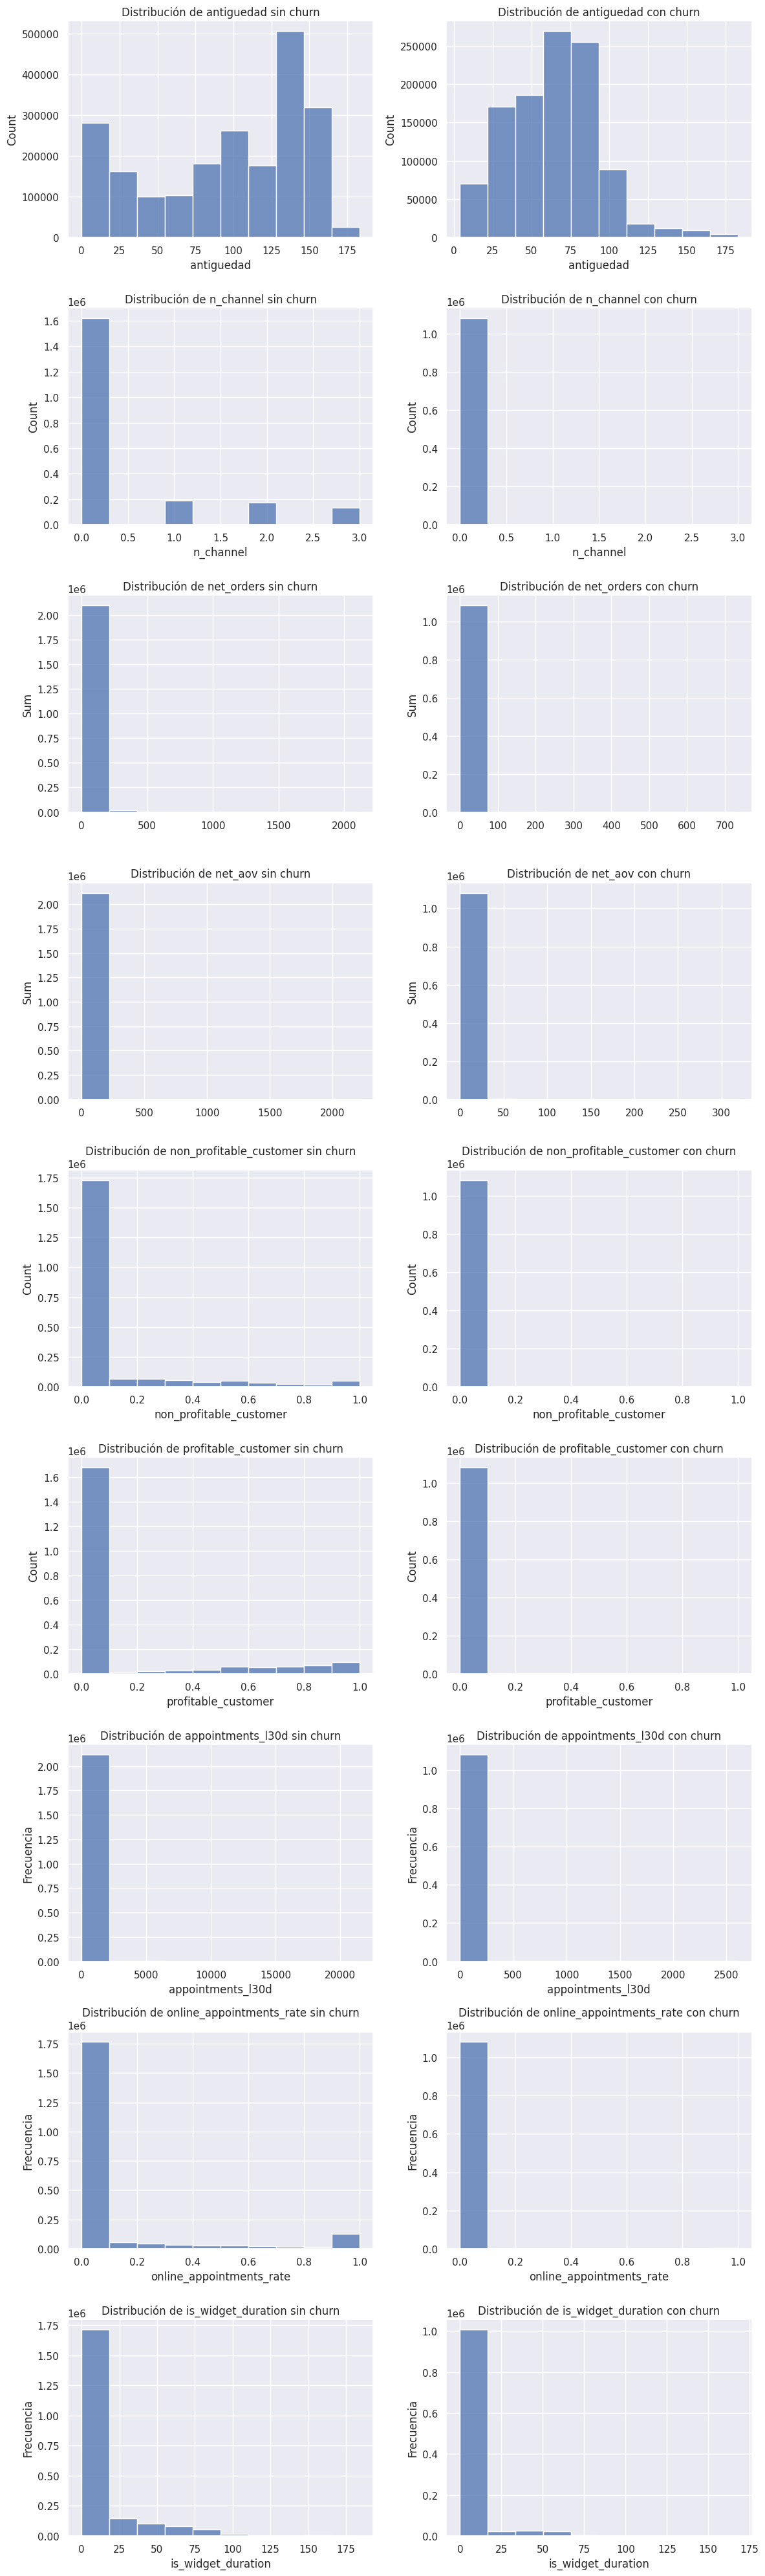

In [ ]:
# Crear el conjunto de figuras
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8), (ax9, ax10), (ax11, ax12), (ax13, ax14), (ax15, ax16), (ax17, ax18)) = plt.subplots(9, 2, figsize=(12, 40))

# Crear el gráfico de la variable antiguedad sin churn
antiguedad_client = merged_df[merged_df["churn"] == 0]
sns.histplot(antiguedad_client["antiguedad"], bins=10, ax=ax1)
ax1.set_title("Distribución de antiguedad sin churn")

# Crear el gráfico de la variable antiguedad con churn
antiguedad_churn = merged_df[merged_df["churn"] == 1]
sns.histplot(antiguedad_churn["antiguedad"], bins=10, ax=ax2)
ax2.set_title("Distribución de antiguedad con churn")

# Crear el gráfico de la variable n_channel sin churn
n_channel_client = merged_df[merged_df["churn"] == 0]
sns.histplot(n_channel_client["n_channel"], bins=10, ax=ax3)
ax3.set_title("Distribución de n_channel sin churn")

# Crear el gráfico de la variable n_channel con churn
n_channel_churn = merged_df[merged_df["churn"] == 1]
sns.histplot(n_channel_churn["n_channel"], bins=10, ax=ax4)
ax4.set_title("Distribución de n_channel con churn")

# Crear el gráfico de la variable net_orders sin churn
net_orders_client = merged_df[merged_df["churn"] == 0]
sns.histplot(net_orders_client.net_orders, bins = 10, ax=ax5)
ax5.set_xlabel('')
ax5.set_ylabel('Sum')
ax5.set_title("Distribución de net_orders sin churn")

# Crear el gráfico de la variable net_orders con churn
net_orders_churn = merged_df[merged_df["churn"] == 1]
sns.histplot(net_orders_churn.net_orders, bins = 10, ax=ax6)
ax6.set_xlabel('')
ax6.set_ylabel('Sum')
ax6.set_title("Distribución de net_orders con churn")

# Crear el gráfico de la variable net_aov sin churn
net_aov_client = merged_df[merged_df["churn"] == 0]
sns.histplot(net_aov_client.net_aov, bins = 10, ax=ax7)
ax7.set_xlabel('')
ax7.set_ylabel('Sum')
ax7.set_title("Distribución de net_aov sin churn")

# Crear el gráfico de la variable net_aov con churn
net_aov_churn = merged_df[merged_df["churn"] == 1]
sns.histplot(net_aov_churn.net_aov, bins = 10, ax=ax8)
ax8.set_xlabel('')
ax8.set_ylabel('Sum')
ax8.set_title("Distribución de net_aov con churn")

# Crear el gráfico de la variable non_profitable_customer sin churn
non_profitable_customer_client = merged_df[merged_df["churn"] == 0]
sns.histplot(non_profitable_customer_client["non_profitable_customer"], bins=10, ax=ax9)
ax9.set_title("Distribución de non_profitable_customer sin churn")

# Crear el gráfico de la variable non_profitable_customer con churn
non_profitable_customer_churn = merged_df[merged_df["churn"] == 1]
sns.histplot(non_profitable_customer_churn["non_profitable_customer"], bins=10, ax=ax10)
ax10.set_title("Distribución de non_profitable_customer con churn")

# Crear el gráfico de la variable profitable_customer sin churn
profitable_customer_client = merged_df[merged_df["churn"] == 0]
sns.histplot(profitable_customer_client["profitable_customer"], bins=10, ax=ax11)
ax11.set_title("Distribución de profitable_customer sin churn")

# Crear el gráfico de la variable profitable_customer con churn
profitable_customer_churn = merged_df[merged_df["churn"] == 1]
sns.histplot(profitable_customer_churn["profitable_customer"], bins=10, ax=ax12)
ax12.set_title("Distribución de profitable_customer con churn")

# Crear el gráfico de la variable appointments_l30d sin churn
appointments_l30d_client = merged_df[merged_df["churn"] == 0]
sns.histplot(appointments_l30d_client["appointments_l30d"], bins=10, ax=ax13)
ax13.set_ylabel("Frecuencia")
ax13.set_title("Distribución de appointments_l30d sin churn")

# Crear el gráfico de la variable appointments_l30d con churn
appointments_l30d_churn = merged_df[merged_df["churn"] == 1]
sns.histplot(appointments_l30d_churn["appointments_l30d"], bins=10, ax=ax14)
ax14.set_ylabel("Frecuencia")
ax14.set_title("Distribución de appointments_l30d con churn")

# Crear el gráfico de la variable online_appointments_rate sin churn
online_appointments_rate_client = merged_df[merged_df["churn"] == 0]
sns.histplot(online_appointments_rate_client["online_appointments_rate"], bins=10, ax=ax15)
ax15.set_ylabel("Frecuencia")
ax15.set_title("Distribución de online_appointments_rate sin churn")

# Crear el gráfico de la variable online_appointments_rate con churn
online_appointments_rate_churn = merged_df[merged_df["churn"] == 1]
sns.histplot(online_appointments_rate_churn["online_appointments_rate"], bins=10, ax=ax16)
ax16.set_ylabel("Frecuencia")
ax16.set_title("Distribución de online_appointments_rate con churn")

# Crear el gráfico de la variable is_widget_duration sin churn
is_widget_duration_client = merged_df[merged_df["churn"] == 0]
sns.histplot(is_widget_duration_client["is_widget_duration"], bins=10, ax=ax17)
ax17.set_ylabel("Frecuencia")
ax17.set_title("Distribución de is_widget_duration sin churn")

# Crear el gráfico de la variable is_widget_duration con churn
is_widget_duration_churn = merged_df[merged_df["churn"] == 1]
sns.histplot(is_widget_duration_churn["is_widget_duration"], bins=10, ax=ax18)
ax18.set_ylabel("Frecuencia")
ax18.set_title("Distribución de is_widget_duration con churn")

# Ajustar el diseño de la figura
fig.tight_layout()

### Conclusions
- **Variable antiquity:** 
  - We can see that the distribution of the antiquity variable behaves differently in both groups.
  - This indicates that this variable may have some importance in the decision to churn different venues.
  - In this case, it seems that venues with greater antiquity have a lower probability of churning.

- **Variable n_channel:** 
  - We can see that the distribution of the n_channel variable behaves differently in both groups.
  - This indicates that this variable may have some importance in the decision to churn different venues.
  - In this case, it seems that venues with a lower number of n_channels have a higher probability of churning.

- **Variable net_orders:** 
  - We can see that the distribution of the net_orders variable behaves differently in both groups.
  - This indicates that this variable may have some importance in the decision to churn different venues.
  - In this case, it seems that venues with a higher number of net_orders have a lower probability of churning.

- **Variable net_aov:** 
  - We can see that the distribution of the net_aov variable behaves differently in both groups.
  - This indicates that this variable may have some importance in the decision to churn different venues.
  - In this case, it seems that venues with a higher net_aov have a lower probability of churning.

- **Variable non_profitable_customer:** 
  - We can see that the distribution of the non_profitable_customer variable behaves differently in both groups.
  - This indicates that this variable may have some importance in the decision to churn different venues.
  - In this case, it seems that venues with a higher percentage of loyal users have a lower probability of churning.

- **Variable profitable_customer:** 
  - We can see that the distribution of the profitable_customer variable behaves differently in both groups.
  - This indicates that this variable may have some importance in the decision to churn different venues.
  - In this case, it seems that venues with a higher percentage of explorer users have a lower probability of churning.

- **Variable appointments_l30d:** 
  - We can see that the distribution of the appointments_l30d variable behaves differently in both groups.
  - This indicates that this variable may have some importance in the decision to churn different venues.
  - In this case, it seems that venues with a higher number of appointments_l30d have a lower probability of churning.

- **Variable online_appointments_rate:** 
  - We can see that the distribution of the online_appointments_rate variable behaves differently in both groups.
  - This indicates that this variable may have some importance in the decision to churn different venues.
  - In this case, it seems that venues with a higher percentage of online appointments have a lower probability of churning.

- **Variable is_widget_duration:** 
  - We can see that the distribution of the is_widget_duration variable behaves relatively similarly in both groups.


In [ ]:
# Crear el CSV
merged_df.to_csv('/content/drive/Shareddrives/Data_TFM/Dataset_Final/df_final_no_codificado.csv', sep=",", index=False)